<a href="https://colab.research.google.com/github/sergey031/DZ_BDP/blob/master/Web_scraping_with_beautiful_soup_and_pandas_complete_(%D0%B8%D0%BD%D0%B4%D0%B8%D0%B2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Парсинг веб-страниц с помощью Beautiful Soup и Pandas



`Веб-скрапинг` — это процесс использования методов для извлечения контента и данных с веб-сайта.

`Веб-скрапинг` — это автоматизированный способ извлечения больших объемов данных с веб-сайтов

В отличие от парсинга экрана, при которой копируются только пиксели, отображаемые на экране, парсинг веб-страниц извлекает базовый HTML-код и вместе с ним данные, хранящиеся в базе данных. Затем парсер может скопировать весь контент веб-сайта в другое место.

Парсинг веб-страниц используется во многих цифровых компаниях, которые полагаются на сбор данных. К законным случаям использования относятся:

- Боты поисковых систем сканируют сайт, анализируют его содержимое и затем ранжируют.
- Сайты сравнения цен, использующие ботов для автоматического получения цен и описаний продуктов для сайтов смежных продавцов.
- Компании, занимающиеся исследованием рынка, используют парсеры для получения данных с форумов и социальных сетей (например, для анализа настроений).

## Table of Contents
[1. Создание базы данных с помощью Beautiful Soup](#I.-Making-Database-From-Scratch-With-Beautiful-Soup) <br>
- [Получение данных](#Scrape-The-Data)
- [Создание баз данных](#Make-A-Database)

[2. Парсинг веб-страниц с использованием Pandas](#II.-Web-Scraping-Using-Pandas) <br>
- [Получение URL-адрес](#Get-The-URL)
- [Чтение HTML-страницы в Pandas](#Read-The-HTML-Webpage-Into-Pandas)
- [Очистка данных](#Data-Cleaning)
- [Быстрый анализ данных](#Quick-Exploratory-Data-Analysis)<br>


## I. Создание базы данных с помощью Beautiful Soup

Существует множество различных пакетов для парсинга веб-страниц, один из самых популярных — [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Beautiful Soup анализирует веб-контент в объект Python и делает [DOM](https://en.wikipedia.org/wiki/Document_Object_Model) доступным для запроса поэлементно. При использовании в сочетании с пакетом запросов он делает парсинг веб-страниц очень простым!

---
### Установка Beautiful Soup
В `bash` терминале или `Anaconda Prompt`,запустить:
```bash
conda install beautifulsoup4
```
---

In [1]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests
import urllib.request
from bs4 import BeautifulSoup

# Для выполнения операций с регулярными выражениями
import re

# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt


Извлечем **random функции  и их описание** из документации Python с веб-сайта [docs.python.org](https://docs.python.org/).

### Очистить данные


In [13]:
# Сохранить URL-адрес веб-страницы, которую мы хотим извлечь в переменную.
url = 'https://finex-etf.ru/products'

При парсинге веб-страниц первым шагом является перенос содержимого страницы в переменную Python (строковую). Для более простых задач веб-скрапинга вы можете сделать это с помощью пакета Requests, который мы здесь будем использовать. Для более сложных задач (например, веб-страниц с большим количеством Javascript или других элементов, отображаемых веб-браузером) вам может потребоваться использовать что-то более сложное, например urllib или [Selenium](https://selenium-python .readthedocs.io/index.html).

In [14]:
# Отправление запроса на получение данных и присваивание ответ переменной.
response = requests.get(url)

In [15]:
response

<Response [200]>

In [16]:
response.content

b'<!DOCTYPE html><html lang="ru"><head><meta name="format-detection" content="telephone=no"/><link rel="icon" href="/favicon.ico"/><meta charSet="utf-8"/><meta name="viewport" content="minimum-scale=1, initial-scale=1, width=device-width user-scalable=no"/><script defer="">(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-KR4BFZ\');</script><meta name="theme-color" content="#1E4B9C"/><title>\xd0\x92\xd1\x81\xd0\xb5 ETF \xd1\x84\xd0\xbe\xd0\xbd\xd0\xb4\xd1\x8b: \xd0\xba\xd0\xb0\xd0\xba\xd0\xb8\xd0\xb5 \xd0\xb0\xd0\xba\xd1\x86\xd0\xb8\xd0\xb8 \xd0\xba\xd1\x83\xd0\xbf\xd0\xb8\xd1\x82\xd1\x8c \xd1\x84\xd0\xb8\xd0\xb7\xd0\xb8\xd1\x87\xd0\xb5\xd1\x81\xd0\xba\xd0\xbe\xd0\xbc\xd1\x83 \xd0\xbb\xd0\

Это нечитабельно. Именно здесь на помощь приходит `Beautiful Soup`.

`Beautiful Soup` помогает нам правильно анализировать содержимое страницы и приводить его в форму, которую нам будет легче использовать.

In [17]:
# Преобразование содержимого в объект Beautiful Soup и присвойте его переменной.
soup = BeautifulSoup(response.content)
type(soup)

bs4.BeautifulSoup

**Проверка результата.**

In [18]:
# Проверка переменной soup.

soup

<!DOCTYPE html>
<html lang="ru"><head><meta content="telephone=no" name="format-detection"/><link href="/favicon.ico" rel="icon"/><meta charset="utf-8"/><meta content="minimum-scale=1, initial-scale=1, width=device-width user-scalable=no" name="viewport"/><script defer="">(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-KR4BFZ');</script><meta content="#1E4B9C" name="theme-color"/><title>Все ETF фонды: какие акции купить физическому лицу, чтобы получить доход | FinEx — биржевые инвестиционные фонды (ETF)</title><meta content="купить акции лицу, etf фонды, рыночные облигации, купить инвестиции, список облигаций, найти облигации, российские облигации, лучшие облигации" name="keywords"/><meta content="Выбирайте 

In [10]:
# Другой способ загрузить html-код, используя 'urllib.request.urlopen()'

url = urllib.request.urlopen("https://finex-etf.ru/products")
soup = BeautifulSoup(url)
soup

<ipython-input-10-5c9e52e29b79>:4: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(url)


<html><body><p>https://finex-etf.ru/products</p></body></html>

**Все еще сложно, но уже легче воспринимать.**

Однако настоящее преимущество `Beautiful Soup` заключается в том, что он *анализирует* нашу веб-страницу в соответствии с ее структурой и позволяет нам *искать* и *извлекать* элементы внутри нее. Это связано с тем, что он преобразует веб-страницу из строки в специальный объект `Beautiful Soup`.

Чтобы извлечь элементы HTML с веб-страницы, необходимо вызвать метод `.find()` для нашего объекта `Beautiful Soup`. Этот метод находит первый элемент, соответствующий переданному нами критерию. Критерием может быть элемент `id`,  `class`, тег `name`, или даже функция. (Полный список элементов поиска см. на [этой странице](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-the-tree).)

Но как нам узнать, какой элемент искать? Здесь  пригодится функция вашего браузера `Inspect` или `Inspect Element`. Просто щелкните правой кнопкой мыши интересующий объект на веб-странице и выберите `Inspect` в Chrome или `Inspect Element` в Firefox. Это покажет соответствующее место в `HTML`-коде, где появляется элемент. Оттуда можно найти идентификатор или имя класса, которые позволят  найти элемент с помощью `Beautiful Soup`.

**В данном случае настроить таргетинг на тег/элемент `dt`, как показано на рисунке ниже:**

<br>
<br>
<img src = "https://docs.google.com/uc?export=download&id=1Mj9K4QnhS5mFMK4Ddx_6OHFUIN-xpR9X" />

<br>
<br>

**Похоже, что ищем элемент `dt` с `id='random.___'`. Можно легко получить это с помощью команды Beautiful Soup `.findAll`.**

In [19]:
# Найдите все имена функций — указываем имя элемента в данном случае «dt»

names = soup.body.findAll('dt')

print(names)

[]


**Еще есть над чем поработать! Именно здесь вступает в силу регулярное выражение.**


In [20]:
# Найдите всю искомую информацию с помощью регулярного выражения
# В этом случае каждая строка начинается с id='random.'

function_names = re.findall('id="random.\w+' , str(names)) # '\w+', означает, что строка должна заканчиваться именем функции.

print(function_names)

[]


**Почти решили задачу! Необходимо удалить первые несколько символов из каждой строки.**

In [21]:
# Использование методов списка для редактирования наших значений:

function_names = [item[4:] for item in function_names]

print(function_names)

[]


**Отлично! Теперь нам нужно сделать то же самое с описанием функции.
Нам нужно указать детали описания с помощью тега `dd`**.

<br>


<img src = "https://docs.google.com/uc?export=download&id=169-W93jfnmbwHejyP4QV4sDQm9LgriwB" />

<br>
<br>

In [22]:
# Найти все описания функций

description = soup.body.findAll('dd')

print(description)

[]


**Сложно! Здесь много тегов (теги `<em>`). Чтобы избавиться от этих ненужных элементов из описанного выше метода вручную, потребуется много времени.**
    
К счастью, BeautifulSoup не только красив, но и умен. Давайте посмотрим на метод `.text`:

In [23]:
# Создание списка

function_usage = []

# Создание цикла

for item in description:
    item = item.text      #  Сохраняем извлеченный текст в переменную
    item = item.replace('\n', ' ')     # чтобы избавиться от оператора следующей строки, которым является `\n`
    function_usage.append(item)



In [24]:
print(function_usage)  # Не перегружайтесь! это всего лишь описания функций из приведенных выше названий функций.

[]


In [25]:
# Давайте проверим длину function_names и function_usage.

print(f' Length of function_names: {len(function_names)}')
print(f' Length of function_usage: {len(function_usage)}')

 Length of function_names: 0
 Length of function_usage: 0


### Создание базы данных

In [26]:
# Создайте фрейм данных, поскольку длина обеих переменных одинакова!

data = pd.DataFrame( {  'function name': function_names,
                      'function usage' : function_usage  } )

data

,function name,function usage


In [27]:
# Давайте создадим файл CSV из фрейма данных.

data.to_csv('random_function.csv')

**БОНУС: если вы хотите настроить таргетинг на определенные атрибуты, например `is="bookkeeping-functions"`, вы можете использовать следующий код:**

In [28]:
# Особые атрибуты таргетинга

example = soup.body.findAll ('div', attrs = {'id' : 'bookeeping-functions'})
print(example)    # можно получить более точный результат поиска с помощью BeautifulSoup

[]


## II. Парсинг веб-страниц с использованием Pandas

`Pandas` - это очень полезно! Можно легко очистить данные, используя функцию pandas `read_html()`.

Собираем данные о статистике игроков `NBA` и выполним быстрый анализ данных с веб-сайта [basketball-reference.com](https://www.basketball-reference.com).

### Получить URL-адрес

Во-первых, мы хотим проверить конкретный [URL](https://www.basketball-reference.com/leagues/NBA_2020_per_game.html), данные по которому мы собираемся собрать — статистику игроков `NBA` за сезон 2019–2020 гг.



In [32]:
# Способ 1: только 1 год

# URL статистики игрока в 2020 году

url = 'https://finex-etf.ru/products'
url

'https://finex-etf.ru/products'

In [33]:
# Способ 2: несколько лет

years = ['2016', '2017', '2018', '2019', '2020']
str = 'https://finex-etf.ru/products'

for year in years:
    url = str.format(year)
    print(url)

https://finex-etf.ru/products
https://finex-etf.ru/products
https://finex-etf.ru/products
https://finex-etf.ru/products
https://finex-etf.ru/products


Чтение веб-страницы HTML в Pandas

In [35]:
# проверим URL-адрес статистики игрока в 2020 году

url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'

df = pd.read_html(url, header = 0)

print(df)

[      Rk                    Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0      1              Steven Adams   C  26  OKC  63  63  26.7  4.5   7.6  ...   
1      2               Bam Adebayo  PF  22  MIA  72  72  33.6  6.1  11.0  ...   
2      3         LaMarcus Aldridge   C  34  SAS  53  53  33.1  7.4  15.0  ...   
3      4            Kyle Alexander   C  23  MIA   2   0   6.5  0.5   1.0  ...   
4      5  Nickeil Alexander-Walker  SG  21  NOP  47   1  12.6  2.1   5.7  ...   
..   ...                       ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
672  525                Trae Young  PG  21  ATL  60  60  35.3  9.1  20.8  ...   
673  526               Cody Zeller   C  27  CHO  58  39  23.1  4.3   8.3  ...   
674  527              Tyler Zeller   C  30  SAS   2   0   2.0  0.5   2.0  ...   
675  528                Ante Žižić   C  23  CLE  22   0  10.0  1.9   3.3  ...   
676  529               Ivica Zubac   C  22  LAC  72  70  18.4  3.3   5.3  ...   

      FT%  ORB  DRB   TRB 

**Выглядит неаккуратно. На самом деле есть список DataFrames. Можно улучшить восприятие этого объекта, используя Pandas (без дополнительных библиотек!)**

In [36]:
# Проверка количества DataFrame в этом списке.

print(f'number of tables in df: {len(df)}')

print('================')

# Поскольку здесь только 1, вытянем 0-й элемент:
df[0].head(20)

number of tables in df: 1


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
5,6,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,...,.867,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7
6,7,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,...,.633,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1
7,8,Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,...,.636,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0
8,9,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,...,.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3
9,10,Justin Anderson,SG,26,BRK,10,1,10.7,1.0,3.8,...,.500,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8


Есть  пропущенные значения (NaN) и несколько вхождений имен некоторых игроков, поскольку они были частью разных команд в одном и том же году.

### Очистка данных

*На сайте заголовок повторяется у каждых 20 игроков.Придется удалить последующие заголовки и оставить только первый заголовок:**

<br>
<br>
<img src = "https://docs.google.com/uc?export=download&id=1CEQs7TNFr4Nak0sQK10QYXl06uXcvrLN" />

<br>
<br>

In [37]:
# Присваиваем таблицу переменной df_2020

df_2020 = df[0]

# Проверим заголовок таблицы, который представлен несколько раз в нескольких строках.

df_2020[df_2020.Age == 'Age'].head() # Весь последующий заголовок таблицы выбран для всего этого кадра данных!


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
53,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
76,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
101,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [38]:
# Проверяем длину имеющегося заголовка:

print(f' общее количество избыточных заголовков: {len(df_2020[df_2020.Age == "Age"])} ')

# Удалите избыточные заголовки в кадре данных:
df_2020_new = df_2020.drop(df_2020[df_2020.Age == 'Age'].index)

# Сравните до и после удаления избыточных заголовков с количеством строк:

print(f' всего строк df_2020: {df_2020.shape[0]} ')
print(f' общее количество строк df_2020_new: {df_2020_new.shape[0]} ')
print('=========================================')

df_2020_new.head(20)

 общее количество избыточных заголовков: 26 
 всего строк df_2020: 677 
 общее количество строк df_2020_new: 651 


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
5,6,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,...,.867,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7
6,7,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,...,.633,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1
7,8,Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,...,.636,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0
8,9,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,...,.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3
9,10,Justin Anderson,SG,26,BRK,10,1,10.7,1.0,3.8,...,.500,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8


### Быстрый исследовательский анализ данных

<ipython-input-39-ed20cf88bd25>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2020_new.PTS,    # Проверка частоты полученнных очков игроком


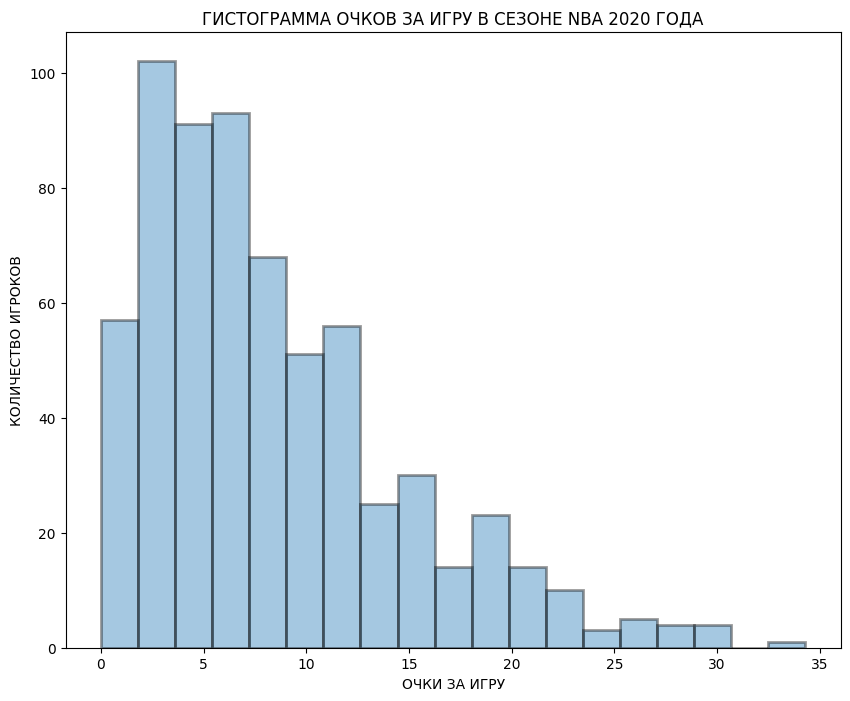

In [39]:
# Создание простой гистограммы

plt.figure(figsize=(10,8))

sns.distplot(df_2020_new.PTS,    # Проверка частоты полученнных очков игроком
            kde= False,          # Должно быть False, потому что  хотим сохранить исходную частоту. ( "kde=True" => это будет вероятность)
            hist_kws = dict( edgecolor = 'black', linewidth=2))

plt.title('ГИСТОГРАММА ОЧКОВ ЗА ИГРУ В СЕЗОНЕ NBA 2020 ГОДА')
plt.ylabel('КОЛИЧЕСТВО ИГРОКОВ')
plt.xlabel('ОЧКИ ЗА ИГРУ')
plt.show()

Из гистограммы мы видим:
- Около 57 игроков имеют от 0 до 1 очка.
- Есть менее 10 игроков, набравших 30 очков.